In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import geopy.distance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import Lasso

In [15]:
df = pd.read_csv("data/merged.csv")

In [16]:
#exclude unneeded columns
df = df[['coord_x', 'coord_y', 'year', 'multiple_floors', 'num_rooms', 'area', 'floor', 'price', 'street_safety_score']]
df['area_per_room'] = df['area'] / df['num_rooms']

In [17]:
# split data
df_price = df[~df['price'].isna()]
split_idx = len(df_price)//2
df_train = df_price[:split_idx]
df_valid = df_price[split_idx:]

x_train = df_train.loc[:, df_price.columns != 'price'].to_numpy()
x_valid = df_valid.loc[:, df_price.columns != 'price'].to_numpy()
y_train = df_train['price'].to_numpy()
y_valid = df_valid['price'].to_numpy()

x_valid = np.nan_to_num(x_valid, nan = 0)
y_valid = np.nan_to_num(y_valid, nan = 0)
x_train = np.nan_to_num(x_train, nan = 0)
y_train = np.nan_to_num(y_train, nan = 0)

In [19]:
model = Lasso(alpha=1.0)
out = model.fit(x_train, y_train)
model.score(x_valid, y_valid)

0.4610299385479757

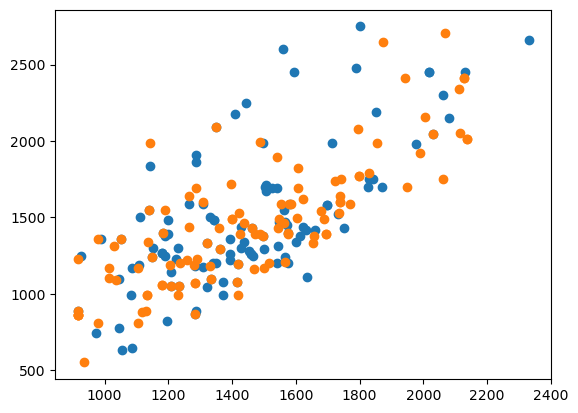

In [25]:
out = model.predict(x_valid)
plt.scatter(out, y_valid)

out2 = model.predict(x_train)
plt.scatter(out2, y_train)